In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine, load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [2]:
df=pd.read_csv("CSV/marketing_campaign.csv",delimiter='	')
df.drop(['Complain', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Dt_Customer','Education','ID'], axis=1, inplace=True)
df = df[df['Income'].notna()]
print(df.shape)

(2216, 19)


In [3]:
df = df[df['Year_Birth'] >= 1940]

In [4]:
df = df[df['Income'] <= 65000.0]
df1 = df[df['Income'] <= 20000.0]
df2 = df[df['Income'] >= 40000.0]
df =pd.concat([df1,df2],axis=0)

In [5]:
df = df[df['Kidhome'] < 2]

In [6]:
df

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
9,1950,Together,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,3,11
11,1976,Married,7500.0,0,0,59,6,16,11,11,1,16,1,2,0,3,8,3,11
14,1987,Married,17323.0,0,0,38,3,14,17,6,1,5,1,1,0,3,8,3,11
21,1979,Married,2447.0,1,0,42,1,1,1725,1,1,1,15,0,28,0,1,3,11
25,1969,Single,18589.0,0,0,89,6,4,25,15,12,13,2,2,1,3,7,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1962,Single,57967.0,0,1,39,229,7,137,4,0,91,5,4,2,8,5,3,11
2231,1970,Single,44802.0,0,0,71,853,10,143,13,10,20,2,9,4,12,8,3,11
2235,1967,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,3,11
2237,1981,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,3,11


In [7]:
n = 1500
x1 = np.array(df['Kidhome'][0:n])
x1 = x1.reshape(len(x1), 1)
x2 = np.array(df['Marital_Status'][0:n])
x2 = x2.reshape(len(x2), 1)
k=0
for i in x2:
    S = ['Single','Married','Divorced','Together','Widow']
    for j in range(len(S)):
        if S[j]==i[0]:x2[k]=j
    k+=1
x3 = np.array(df['Year_Birth'][0:n])
x3 = x3.reshape(len(x3), 1)
x4 = np.array(df['Income'][0:n])
x4 = x4.reshape(len(x4), 1)
#x5 = np.array(df['Kidhome'][0:n])
#x5 = x5.reshape(len(x5), 1)
x = np.concatenate((x1,x2,x3,x4),1)
y = np.array(df['NumStorePurchases'][0:n])
y = y.reshape(len(y), 1)
# ax = sns.heatmap(x1, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x3, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x4, linewidth=0.5)
# plt.show()
# ax = sns.heatmap(x5, linewidth=0.5)
# plt.show()
y1 = np.array(df['MntMeatProducts'][0:n])
y1 = y1.reshape(len(y1), 1)
y2 = np.array(df['MntFishProducts'][0:n])
y2 = y2.reshape(len(y2), 1)
y3 = np.array(df['MntSweetProducts'][0:n])
y3 = y3.reshape(len(y3), 1)
y4 = np.array(df['MntGoldProds'][0:n])
y4 = y4.reshape(len(y4), 1)
y_n = np.concatenate((y1,y2,y3,y4),1)
#print(x)
z = np.array(df['NumStorePurchases'][0:n])

In [8]:
print(df.keys())
X = y_n

Index(['Year_Birth', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')


In [9]:
print(X)

[[  6   1   1  13]
 [ 11  11   1  16]
 [ 17   6   1   5]
 ...
 [182  42 118 247]
 [217  32  12  24]
 [ 61   2   1  21]]


# PCA Principal component analysis

Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Изобретён Карлом Пирсоном в 1901 году. Применяется во многих областях, в том числе, в эконометрике, биоинформатике, обработке изображений, для сжатия данных, в общественных науках[⇨].

Вычисление главных компонент может быть сведено к вычислению сингулярного разложения матрицы данных[⇨] или к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных[⇨]. Иногда метод главных компонент называют преобразованием Кархунена — Лоэва[1] или преобразованием Хотеллинга (англ. Hotelling transform).

In [10]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

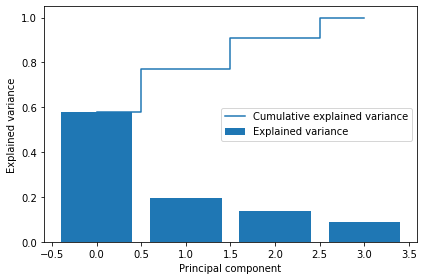

In [11]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [12]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

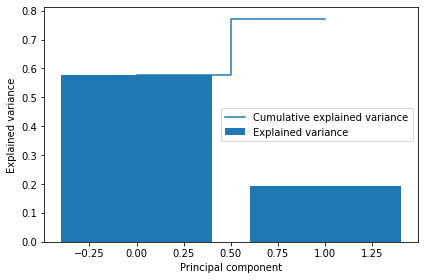

In [13]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Digits

In [14]:
# digits = load_digits()

# X = digits.data
# y = digits.target
# print(digits.data.shape)

In [15]:
# plt.gray() 
# plt.matshow(digits.images[0]) 
# plt.show() 

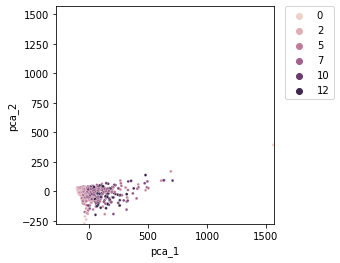

In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': z})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax, s=8)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# TSNE

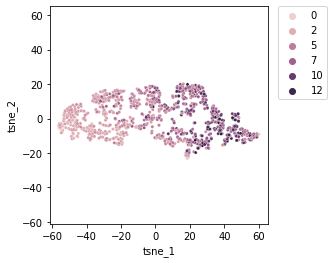

In [17]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': z})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [18]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

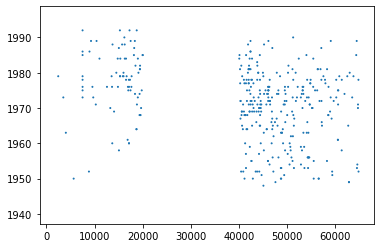

In [19]:
#data = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=1, random_state = 0)
plt.scatter(x4,x3,x1)

In [20]:
X = np.concatenate((x4,x3),1)

# Elbow plot

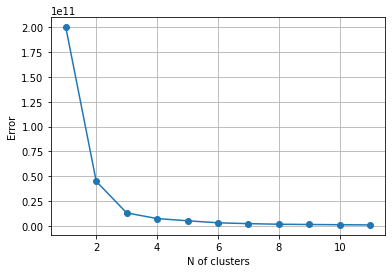

In [21]:
Error =[]
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 12), Error, marker = 'o')
plt.xlabel('N of clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

# Silhouette score

Силует відноситься до методу інтерпретації та перевірки узгодженості всередині кластерів даних . Техніка забезпечує стисле графічне представлення того, наскільки добре класифіковано кожен об’єкт. [1]

Значення силуету є мірою того, наскільки об’єкт схожий на власний кластер (згуртованість) порівняно з іншими кластерами (розділення). Силует коливається від −1 до +1, де високе значення вказує на те, що об’єкт добре поєднується з власним кластером і погано поєднується з сусідніми кластерами. Якщо більшість об’єктів мають високе значення, то конфігурація кластеризації є відповідною. Якщо багато точок мають низьке або від’ємне значення, то в конфігурації кластеризації може бути занадто багато або занадто мало кластерів.

Силует можна обчислити за допомогою будь-якої метрики відстані , наприклад, евклідова відстань або відстань Манхеттена .

In [22]:
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, kmeans_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.7818502676050078
For n_clusters = 3  silhouette average: 0.6609369312641908
For n_clusters = 4  silhouette average: 0.6269415427803441
For n_clusters = 5  silhouette average: 0.6126315795228323
For n_clusters = 6  silhouette average: 0.6000592730197719


# Clustering:

k = 2

Метод k-средних (англ. k-means) — наиболее популярный метод кластеризации. Был изобретён в 1950-х годах математиком Гуго Штейнгаузом[1] и почти одновременно Стюартом Ллойдом[2]. Особую популярность приобрёл после работы Маккуина[3].

Действие алгоритма таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров:

Алгоритм представляет собой версию EM-алгоритма, применяемого также для разделения смеси гауссиан. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k.

Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге суммарное квадратичное отклонение V уменьшается, поэтому зацикливание невозможно.

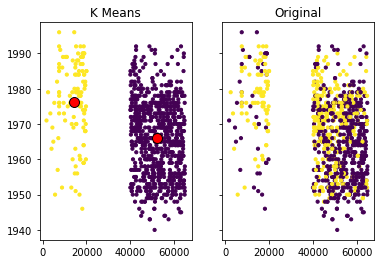

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('K Means')
ax1.scatter(x4,x3,c=labels,s=10)
ax2.set_title("Original")
ax2.scatter(x4,x3,c=x1,s=10)
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')

Fitting model on a small sub-sample of the data
done in 0.340s.
Predicting color indices on the full image (k-means)
done in 0.021s.
Predicting color indices on the full image (random)
done in 0.326s.


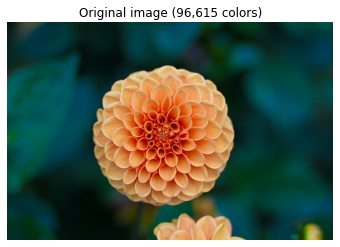

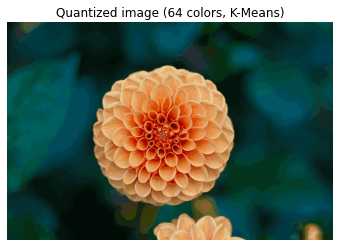

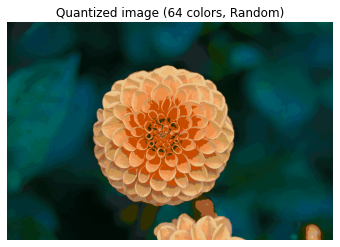

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image('flower.jpg')

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

# Generate Data

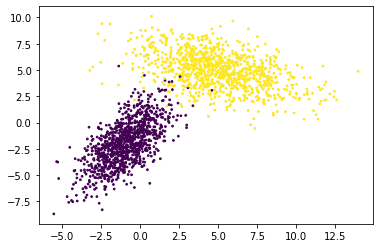

In [25]:
num_points = 1000

mean_1 = [-1, -2]
cov_1 = [[2, 2], [2, 5]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [5, 5]
cov_2 = [[7, -2], [-2, 3]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)

# Silhouette score

In [26]:
for i in range(2, 5):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.6253778024487603
For n_clusters = 3  silhouette average: 0.5154796935492966
For n_clusters = 4  silhouette average: 0.41378028633510555


# Covariance type

In [27]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)

means 
[[ 4.95283893  4.96401385]
 [-0.93661641 -1.95438654]]
covariances 
[[[ 7.00623692 -1.94443418]
  [-1.94443418  2.86711357]]

 [[ 1.99526197  1.94896527]
  [ 1.94896527  4.4910728 ]]]


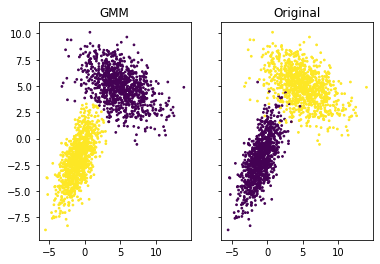

In [28]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

Модель гаусової суміші (GMM) намагається знайти суміш багатовимірних гауссових розподілів ймовірностей, які найкраще моделюють будь-який набір вхідних даних. У найпростішому випадку GMM можна використовувати для пошуку кластерів так само

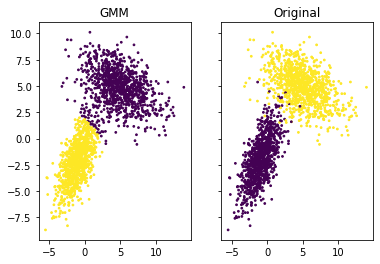

In [29]:
GMM = GaussianMixture(n_components=2, covariance_type='spherical')
GMM.fit(X)

labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenization

Токенізатори поділяють рядки на списки підрядків.

In [31]:
text = 'Data science is a multi-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data.'
words = word_tokenize(text)
words

['Data',
 'science',
 'is',
 'a',
 'multi-disciplinary',
 'field',
 'that',
 'uses',
 'scientific',
 'methods',
 ',',
 'processes',
 ',',
 'algorithms',
 'and',
 'systems',
 'to',
 'extract',
 'knowledge',
 'and',
 'insights',
 'from',
 'structured',
 'and',
 'unstructured',
 'data',
 '.']

# Stop words filtration

Стемінг (англ. stemming) - це процес скорочення слова до основи шляхом відкидання допоміжних частин, таких як закінчення чи суфікс. Результати стемінгу іноді дуже схожі на визначення кореня слова, але його алгоритми базуються на інших принципах.

Лематизація — перетворення слова в словниковий вид або лемму. Даний метод використовується в алгоритмах пошукачів при індексуванні інтернет-сторінок. Процес дає можливість зберігання даних сторінки набором слів в індексі для зручної схематизації файлів. Це, у свою чергу, дозволяє прискорити індексацію і сформувати більш чітку відповідь на пошукової запит, так як скорочену форму слова пошуковик аналізує швидше.

In [56]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
#text = "This is a sample sentence, showing off the stop words filtration."
f = open('TEXT/text.txt', 'r'); text = f.read();f.close()
text_tokens = word_tokenize(text)
filtered_text = []
for w in text_tokens:
    if w not in stop_words:
        filtered_text.append(w)
print('text: ', text_tokens)
print('filtered: ', filtered_text)

text:  ['__label__2', 'Great', 'CD', ':', 'My', 'lovely', 'Pat', 'has', 'one', 'of', 'the', 'GREAT', 'voices', 'of', 'her', 'generation', '.', 'I', 'have', 'listened', 'to', 'this', 'CD', 'for', 'YEARS', 'and', 'I', 'still', 'LOVE', 'IT', '.', 'When', 'I', "'m", 'in', 'a', 'good', 'mood', 'it', 'makes', 'me', 'feel', 'better', '.', 'A', 'bad', 'mood', 'just', 'evaporates', 'like', 'sugar', 'in', 'the', 'rain', '.', 'This', 'CD', 'just', 'oozes', 'LIFE', '.', 'Vocals', 'are', 'jusat', 'STUUNNING', 'and', 'lyrics', 'just', 'kill', '.', 'One', 'of', 'life', "'s", 'hidden', 'gems', '.', 'This', 'is', 'a', 'desert', 'isle', 'CD', 'in', 'my', 'book', '.', 'Why', 'she', 'never', 'made', 'it', 'big', 'is', 'just', 'beyond', 'me', '.', 'Everytime', 'I', 'play', 'this', ',', 'no', 'matter', 'black', ',', 'white', ',', 'young', ',', 'old', ',', 'male', ',', 'female', 'EVERYBODY', 'says', 'one', 'thing', '``', 'Who', 'was', 'that', 'singing', '?', "''", '__label__2', 'One', 'of', 'the', 'best', 'g

In [61]:
def frequency_sort(items):
    b=sorted(items,key=items.count,reverse = True)
    return b
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
f_filtered_text = f7(frequency_sort(filtered_text))
f_filtered_text


['.',
 ',',
 'I',
 ':',
 '!',
 'book',
 "'s",
 "n't",
 '__label__2',
 'The',
 '__label__1',
 'This',
 'It',
 'one',
 'would',
 'read',
 'like',
 "''",
 ')',
 '(',
 '...',
 'good',
 '``',
 'great',
 'A',
 'get',
 'time',
 'work',
 'many',
 'product',
 'well',
 'better',
 '-',
 "'m",
 'books',
 'way',
 'still',
 '?',
 'really',
 'think',
 'game',
 'author',
 'lot',
 'Christmas',
 '*',
 'year',
 'works',
 'something',
 'movie',
 'people',
 'know',
 'new',
 'first',
 'love',
 'money',
 'much',
 'ever',
 'story',
 'Great',
 'bad',
 'best',
 'even',
 'price',
 'If',
 'back',
 'real',
 'CD',
 'My',
 'music',
 'use',
 'size',
 'recommend',
 'going',
 'could',
 'make',
 'reading',
 'life',
 'made',
 'old',
 'find',
 'another',
 '&',
 'put',
 '....',
 'never',
 'But',
 'want',
 'looking',
 'also',
 "'ve",
 'Not',
 '5',
 'light',
 "'",
 'small',
 'help',
 'got',
 'different',
 'enough',
 'As',
 'two',
 'right',
 'found',
 'review',
 'Apple',
 'play',
 'thing',
 'look',
 'power',
 'entire',
 'far'

# Stemming and Lemmatization

In [34]:
#text = 'list lists listed listing listings'
tokens = word_tokenize(text)
tokens 

['__label__2',
 'Great',
 'CD',
 ':',
 'My',
 'lovely',
 'Pat',
 'has',
 'one',
 'of',
 'the',
 'GREAT',
 'voices',
 'of',
 'her',
 'generation',
 '.',
 'I',
 'have',
 'listened',
 'to',
 'this',
 'CD',
 'for',
 'YEARS',
 'and',
 'I',
 'still',
 'LOVE',
 'IT',
 '.',
 'When',
 'I',
 "'m",
 'in',
 'a',
 'good',
 'mood',
 'it',
 'makes',
 'me',
 'feel',
 'better',
 '.',
 'A',
 'bad',
 'mood',
 'just',
 'evaporates',
 'like',
 'sugar',
 'in',
 'the',
 'rain',
 '.',
 'This',
 'CD',
 'just',
 'oozes',
 'LIFE',
 '.',
 'Vocals',
 'are',
 'jusat',
 'STUUNNING',
 'and',
 'lyrics',
 'just',
 'kill',
 '.',
 'One',
 'of',
 'life',
 "'s",
 'hidden',
 'gems',
 '.',
 'This',
 'is',
 'a',
 'desert',
 'isle',
 'CD',
 'in',
 'my',
 'book',
 '.',
 'Why',
 'she',
 'never',
 'made',
 'it',
 'big',
 'is',
 'just',
 'beyond',
 'me',
 '.',
 'Everytime',
 'I',
 'play',
 'this',
 ',',
 'no',
 'matter',
 'black',
 ',',
 'white',
 ',',
 'young',
 ',',
 'old',
 ',',
 'male',
 ',',
 'female',
 'EVERYBODY',
 'says',


In [35]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
[stemmer.stem(t) for t in tokens]

['__label__2',
 'great',
 'cd',
 ':',
 'my',
 'love',
 'pat',
 'ha',
 'one',
 'of',
 'the',
 'great',
 'voic',
 'of',
 'her',
 'gener',
 '.',
 'i',
 'have',
 'listen',
 'to',
 'thi',
 'cd',
 'for',
 'year',
 'and',
 'i',
 'still',
 'love',
 'it',
 '.',
 'when',
 'i',
 "'m",
 'in',
 'a',
 'good',
 'mood',
 'it',
 'make',
 'me',
 'feel',
 'better',
 '.',
 'a',
 'bad',
 'mood',
 'just',
 'evapor',
 'like',
 'sugar',
 'in',
 'the',
 'rain',
 '.',
 'thi',
 'cd',
 'just',
 'ooz',
 'life',
 '.',
 'vocal',
 'are',
 'jusat',
 'stuun',
 'and',
 'lyric',
 'just',
 'kill',
 '.',
 'one',
 'of',
 'life',
 "'s",
 'hidden',
 'gem',
 '.',
 'thi',
 'is',
 'a',
 'desert',
 'isl',
 'cd',
 'in',
 'my',
 'book',
 '.',
 'whi',
 'she',
 'never',
 'made',
 'it',
 'big',
 'is',
 'just',
 'beyond',
 'me',
 '.',
 'everytim',
 'i',
 'play',
 'thi',
 ',',
 'no',
 'matter',
 'black',
 ',',
 'white',
 ',',
 'young',
 ',',
 'old',
 ',',
 'male',
 ',',
 'femal',
 'everybodi',
 'say',
 'one',
 'thing',
 '``',
 'who',
 '

In [36]:
nltk.download('wordnet')
[lemmatizer.lemmatize(t) for t in tokens]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['__label__2',
 'Great',
 'CD',
 ':',
 'My',
 'lovely',
 'Pat',
 'ha',
 'one',
 'of',
 'the',
 'GREAT',
 'voice',
 'of',
 'her',
 'generation',
 '.',
 'I',
 'have',
 'listened',
 'to',
 'this',
 'CD',
 'for',
 'YEARS',
 'and',
 'I',
 'still',
 'LOVE',
 'IT',
 '.',
 'When',
 'I',
 "'m",
 'in',
 'a',
 'good',
 'mood',
 'it',
 'make',
 'me',
 'feel',
 'better',
 '.',
 'A',
 'bad',
 'mood',
 'just',
 'evaporates',
 'like',
 'sugar',
 'in',
 'the',
 'rain',
 '.',
 'This',
 'CD',
 'just',
 'ooze',
 'LIFE',
 '.',
 'Vocals',
 'are',
 'jusat',
 'STUUNNING',
 'and',
 'lyric',
 'just',
 'kill',
 '.',
 'One',
 'of',
 'life',
 "'s",
 'hidden',
 'gem',
 '.',
 'This',
 'is',
 'a',
 'desert',
 'isle',
 'CD',
 'in',
 'my',
 'book',
 '.',
 'Why',
 'she',
 'never',
 'made',
 'it',
 'big',
 'is',
 'just',
 'beyond',
 'me',
 '.',
 'Everytime',
 'I',
 'play',
 'this',
 ',',
 'no',
 'matter',
 'black',
 ',',
 'white',
 ',',
 'young',
 ',',
 'old',
 ',',
 'male',
 ',',
 'female',
 'EVERYBODY',
 'say',
 'one',

# Wordnet

WordNet — это словарь английского языка, похожий на традиционный тезаурус NLTK, включающий в себя английский WordNet. Мы можем использовать его в качестве справочного материала для получения значения слов, примера использования и определения. Коллекция похожих слов называется леммами. Слова в WordNet организованы и узлы и ребра, где узлы представляют текст слова, а ребра представляют отношения между словами. 

In [37]:
from nltk.corpus import wordnet as wn
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [38]:
wn.synset('dog.n.01').lemma_names()

['dog', 'domestic_dog', 'Canis_familiaris']

In [39]:
for i in range(len(wn.synset('dog.n.01').hypernyms())):
    print(wn.synset('dog.n.01').hypernyms()[i].lemma_names())

['canine', 'canid']
['domestic_animal', 'domesticated_animal']


In [40]:
for i in range(len(wn.synset('dog.n.01').hyponyms())):
    print(wn.synset('dog.n.01').hyponyms()[i].lemma_names())

['basenji']
['corgi', 'Welsh_corgi']
['cur', 'mongrel', 'mutt']
['dalmatian', 'coach_dog', 'carriage_dog']
['Great_Pyrenees']
['griffon', 'Brussels_griffon', 'Belgian_griffon']
['hunting_dog']
['lapdog']
['Leonberg']
['Mexican_hairless']
['Newfoundland', 'Newfoundland_dog']
['pooch', 'doggie', 'doggy', 'barker', 'bow-wow']
['poodle', 'poodle_dog']
['pug', 'pug-dog']
['puppy']
['spitz']
['toy_dog', 'toy']
['working_dog']


In [41]:
for lemma in wn.synset('dog.n.01').lemmas():
    print(lemma, lemma.frame_ids())
    print(" | ".join(lemma.frame_strings()))
  
dog = wn.synset('dog.n.01')
dog.path_similarity(dog)

Lemma('dog.n.01.dog') []

Lemma('dog.n.01.domestic_dog') []

Lemma('dog.n.01.Canis_familiaris') []



1.0

# Part of speech tagging

In [42]:
nltk.download('averaged_perceptron_tagger')
#text = 'Bob is great'
words = word_tokenize(text)
from nltk import pos_tag
pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('__label__2', 'RB'),
 ('Great', 'NNP'),
 ('CD', 'NN'),
 (':', ':'),
 ('My', 'PRP$'),
 ('lovely', 'JJ'),
 ('Pat', 'NNP'),
 ('has', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('GREAT', 'JJ'),
 ('voices', 'NNS'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('generation', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('listened', 'VBN'),
 ('to', 'TO'),
 ('this', 'DT'),
 ('CD', 'NN'),
 ('for', 'IN'),
 ('YEARS', 'NNP'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('still', 'RB'),
 ('LOVE', 'VB'),
 ('IT', 'NNP'),
 ('.', '.'),
 ('When', 'WRB'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('mood', 'NN'),
 ('it', 'PRP'),
 ('makes', 'VBZ'),
 ('me', 'PRP'),
 ('feel', 'VB'),
 ('better', 'RB'),
 ('.', '.'),
 ('A', 'DT'),
 ('bad', 'JJ'),
 ('mood', 'NN'),
 ('just', 'RB'),
 ('evaporates', 'VBZ'),
 ('like', 'IN'),
 ('sugar', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('rain', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('CD', 'NN'),
 ('just', 'RB'),
 ('oozes', 'JJ'),
 ('LIFE', '

In [43]:
nltk.download('tagsets')
from nltk.help import upenn_tagset
upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
all_train = fetch_20newsgroups(subset='train')
all_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [45]:
 for i in range (10):
    print("\n".join(all_train.data[i].split("\n")))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.wa

In [46]:
categories = all_train.target_names
all_train = fetch_20newsgroups()
for i in range (1):
    print("\n".join(all_train.data[i].split("\n")))
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)
print('<----------------------------->')
for i in range (1):
    print("\n".join(newsgroups_train.data[i].split("\n")))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





<----------------------------->
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper wa

# Vectorization with CountVectorizer

Машини не можуть розуміти символи та слова. Тому, маючи справу з текстовими даними, нам потрібно представити їх у цифрах, щоб машина була зрозуміла. Лічильник – це метод перетворення тексту в числові дані. 


Ця реалізація створює розріджене представлення лічильників за допомогою scipy.sparse.csr_matrix.

Якщо ви не надаєте апріорний словник і не використовуєте аналізатор, який виконує якийсь вибір ознак, то кількість ознак буде дорівнювати розміру словника, знайденому шляхом аналізу даних.

Countvectoriz дозволяє легко використовувати текстові дані безпосередньо в машинному навчанні та моделях глибокого навчання, таких як класифікація тексту.

In [47]:
# example 1

n_features = 1000 
count_vectorizer = CountVectorizer(max_df=0.95, min_df=0.05,
                                max_features=n_features,
                                stop_words='english')

train_count_vectorizer = count_vectorizer.fit_transform(newsgroups_train.data)
test_count_vectorizer = count_vectorizer.transform(newsgroups_test.data)

clf = LogisticRegression(random_state=0).fit(train_count_vectorizer, newsgroups_train.target)
predicted = clf.predict(test_count_vectorizer)

print(classification_report(newsgroups_test.target, predicted))

              precision    recall  f1-score   support

           0       0.19      0.13      0.16       319
           1       0.21      0.20      0.20       389
           2       0.43      0.39      0.41       394
           3       0.21      0.14      0.17       392
           4       0.14      0.13      0.13       385
           5       0.26      0.28      0.27       395
           6       0.19      0.67      0.30       390
           7       0.14      0.06      0.08       396
           8       0.12      0.15      0.13       398
           9       0.18      0.23      0.20       397
          10       0.18      0.22      0.20       399
          11       0.19      0.15      0.17       396
          12       0.14      0.13      0.13       393
          13       0.12      0.08      0.09       396
          14       0.16      0.11      0.13       394
          15       0.38      0.32      0.35       398
          16       0.15      0.09      0.11       364
          17       0.21    

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# my_words = [
#     'father; mother; parents;

# son; daughter; child; children; offspring;

# brother; sister; sibling; siblings;

# twins; twin brothers; twin brother; twin sisters; twin sister;

# younger brother; kid brother; older sister; elder sister;

# to bring up children; to raise children;',
# '
# the Internet
# website
# broadband internet or broadband
# ISP (abbreviation of internet service provider)
# firewall
# web hosting
# wireless internet or WiFi
# to download
# to browse the Internet',
    
# ]

my_train_texts = [
"""My Family. I am Zhilin Andrey. Andrey is my name and Zhilin is my surname. I am seventeen years old. I want to tell you a few words about my family. My family is not large. I have got mother, father and grandmother. There are four of us in the family.
First of all some words about my parents. My mother is a teacher of biology. She works in a school. She likes her profession. She is a good-looking woman with brown hair. She is 44 but she looks much younger.
My father is programmer. He is forty-six. My father often sings and when we are at home and have some free time I play guitar and we sing together. He is also handy with many things. When he was small he liked to take everything to pieces. My grandmother told me a story that once my father tried to repair their kitchen clock but without success. They had to give it to a repairman. But it happened a long time ago. Now he can fix almost everything.
My parents have been married for 18 years. They have much in common, but they have different views on music, books, and films. For example my father likes horror films and my mother likes soap operas. My father is fond of tennis. My mother doesn't go in for sports.
My parents are hard working people. My mother keeps house and takes care of my father and me. She is very good at cooking. My grandmother is a pensioner. She lives with us and helps to run the house. She is fond of knitting.
I want to become a student. I would like to learn foreign languages. I always try to be in a good mood.
We have got a lot of relatives.""",

"""Modern astronomy
The discovery of the telescope changed the way scientists could observe space. While ancient people only were able to see objects near Earth, telescopes were able to find Uranus, Neptune and Pluto, the distant planets of our solar system.

Astronomers also found that an asteroid belt moves around the sun between the Earth and Mars. With the help of powerful telescopes, they were able to  map the surface of the moon and other planets in great detail.
Modern astronomy uses powerful telescopes on earth to see objects far away from our solar system. It also relies on images sent to earth from orbiting telescopes, like the Hubble Space Telescope, which has been in operation since 1990.

Unmanned spacecraft that land on the moon and other planets give astronomers large amounts of data and images that they can use for their work. Astronomers also study samples of rocks that spacecraft have brought back to Earth.
Today, astronomers use computers to simulate movements and events that may happen in space. For example, they can predict how close an asteroid can come to earth or when certain comets appear.
Astronomers measure distances in light years – how far light can travel in one year, which is about 6 trillion miles (9.4 trillion km). They have found out that our galaxy, the Milky Way, has a diameter of 100,000 light years. The nearest star is Proxima Centauri, about four light years away from Earth."""
,
"""Preparing food
Jack was hungry. He walked to the kitchen. He got out some eggs. He took out some oil. He placed a skillet on the stove. Next, he turned on the heat. He poured the oil into the skillet. He cracked the eggs into a bowl. He stirred the eggs. Then, he poured them into the hot skillet. He waited while the eggs cooked. They cooked for two minutes. He heard them cooking. They popped in the oil.

Next, Jack put the eggs on a plate. He placed the plate on the dining room table. Jack loved looking at his eggs. They looked pretty on the white plate. He sat down in the large wooden chair. He thought about the day ahead. He ate the eggs with a spoon. They were good.

He washed the plate with dishwashing soap. Then, he washed the pan. He got a sponge damp. Finally, he wiped down the table. Next, Jack watched TV."""
,
"""I’m sure we all know by now that exercise is great for you. But let’s be honest, sometimes finding that motivation to work out can be a little difficult. So, in this post, I am going to share my top five reasons for working out.

1. Exercise can completely change your mood!

When you work out, your body produces endorphins, which will give you a rush of euphoria and happiness. You will feel better after a workout than you did before it. Next time you’re having a bad day, try going for a fast-paced run or taking a spinning class, and the day won’t seem so bad after all.

2. Exercising is sociable.

Whenever I move to a new city to study or work, I look for exercise classes to do. You meet like-minded people, you can support each other during a difficult workout and you all share a collective feeling of euphoria when the class finishes!

3. Exercise makes you feel confident.

We all know the physical effects of exercise on our bodies but we don’t always talk about the mental effects. Exercise might give you a feeling of confidence from being comfortable with your body and appearance. This new confidence might even help in your social or work life.

4. It helps to relieve stress.

Focusing on lifting weights or going for a run can help you forget the problems and stress of daily life, studies or work. During exams, I always spend an hour a day in the gym. It makes me feel less anxious and it also helps me to sleep those important eight hours the night before a big exam.

5. Finally, exercise makes us feel strong, fit and healthy!

Every day, the 20 minutes on the treadmill get easier, the weights feel lighter and you feel a great sense of achievement. It's a great feeling doing something you couldn’t do before and knowing it’s a result of your hard work.

So, next time you’re feeling down, put your trainers on and get sweating. It might not be easy but I promise you will feel so much better once you have finished!"""
]

Classes=[0,1,2,3]

my_test_text = [
    """Essay on My family
Someone said, “The most important thing in the world is family and love.” I think that a lot of people agree with this statement.
My family consists of four people: my lovely father, mother, elder brother and me.
My father’s name is Vladimir. He had been working as a deputy manager in the mining company, before he was pensioned off. Now he is 62 and takes care of my mother and our household. By the way, he had started cooking really great dishes after he retired, it's his favorite hobby.
My mother’s name is Olga. She is an IT manager in the treasure house. She has been working with computers for as long as I remember. I think she enjoys tinkering with them and making some changes in the software. She is 58, but still looks as if she's 48. Amazing!
My parents are kind but rather strict in educating their children and grandchildren. They always give me and my brother some good advice on how to live and share their life experience with us.

My elder brother works as a lawyer. His name is Denis. Now he lives with his own family in another country and I terribly miss our get-together time. He is quite handsome man with dark brown hair which has just started to go gray. Thank goodness, my sister-in-law is not a jealous woman. He is sincere and reliable. I can rely on him in any difficult situation. Also he is a 2–year–old girl proud father. Her name is Elizabeth, and she behaves like a real queen. She always demands attention of her parents and likes to boss around a little bit.
I can say that we’re a very amiable family. My parents understand us at first glance, and we help each other without further ado.""",
"""The Milky Way is a large band of stars, dust and gas that make up our galaxy. It contains billions of stars. Our sun and the solar system is only one of them. The Milky Way is only one of billions of galaxies that make up our universe. It has a diameter of about 100,000 light years and is as old as the universe itself. The name probably refers to how we see our galaxy - a white blurry band that looks like spilled milk.
The Milky Way has the shape of a thin disk with six spiral arms coming out of a bulge in the center . This bulge consists of a cluster of large stars, gas and dust as well as a strong magnetic field. The whole galaxy rotates around this inner bar of stars. New stars are constantly formed around the spiral arms. Most of the stars in our galaxy are red dwarfs, cold stars that are much smaller than our sun.""",

"""For breakfast English people often have porridge with milk and sugar. They don’t eat much bread. They usually have toasts. They enjoy drinking strong tea with milk.
At one o’clock English people have lunch. They usually have lunch in a restaurant or a cafe.

On a warm sunny day you can see people under the trees on the grass eating their sandwiches.

English people don’t eat much soup. There is only one kind of soup on the menu: onion (луковый), tomato (томатный) or mushroom (грибной).

For the main course (на второе) they have fish, steak or roast beef with vegetables: carrots, cabbages, beans or potatoes.

Five o’clock tea is a national habit. English people have tea with biscuits, apple pie, fruit or fruit salad or sandwiches.At about seven or eight o’clock they have dinner or supper.

It can be soup, sometimes meat and vegetables, macaroni (pasta) and cheese.
The English people drink little coffee. Tea is their favourite drink.""",
"""I have recently begun my year abroad working as an English language assistant in a secondary school in the north of Italy and for my first lessons with my classes, the teachers asked me to prepare a presentation about my life in the UK. I had to include information about my family, my studies and my hobbies. The students then asked me questions to find out more and many of them asked, ‘Do you play any sports?’, to which I replied, ‘Yes, I play netball.' Each time, I was met with a sea of bewildered faces as none of the students had heard of netball!

Netball is particularly popular in the UK, Australia and New Zealand and I have played this wonderful game since I was at primary school. It is a team sport which is similar to both basketball and handball. There are seven players on each team and they each wear a bib which shows the name of the position they play. Players must throw the ball to one another and the aim of the game is to pass the ball to the ‘Goal Shooter’ or ‘Goal Attack’ who can shoot the ball into the net to score a goal. However, the key aspects of netball are that you cannot bounce the ball and you cannot move your feet when you have the ball. This is called the footwork rule and it can be quite difficult to grasp for young children playing the game! A full match lasts for one hour and in a single match often about 100 goals are scored which shows what a fast-paced and exciting game netball is!

Netball is typically played by women and girls. However, at many universities, there are mixed netball leagues in which teams must have both male and female players. In the UK, there are many different schemes to try to inspire people to play netball. One such scheme is called ‘Back to Netball’ which encourages women who have not played netball since they were at school to rediscover their love for the sport and get back on the court! Walking netball is another variation of the sport aimed at older women and those who want to exercise in a gentler way. So, why not watch a video of netball online and then have a go for yourself?""" 
]

count_vectorizer = CountVectorizer(max_features=n_features,
                                stop_words='english')
train_count_vectorizer = count_vectorizer.fit_transform(my_train_texts)
test_count_vectorizer = count_vectorizer.transform(my_test_text)

clf = LogisticRegression(random_state=0).fit(train_count_vectorizer, Classes)
predicted = clf.predict(test_count_vectorizer)

print(Classes, predicted)

print(classification_report(Classes, predicted))

[0, 1, 2, 3] [0 2 2 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.50      0.38         4
weighted avg       0.33      0.50      0.38         4



c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# # example 2

# count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# train_count_vectorizer = count_vectorizer.fit_transform(newsgroups_train.data)
# test_count_vectorizer = count_vectorizer.transform(newsgroups_test.data)

# clf = LogisticRegression(random_state=0).fit(train_count_vectorizer, newsgroups_train.target)
# predicted = clf.predict(test_count_vectorizer)

# print(classification_report(newsgroups_test.target, predicted))

# Vectorization with TFIDF

Алгоритм уменьшения размерности под названием t-SNE (t-distributed stochastic neighbor embedding, стохастическое вложение соседей с распределением Стьюдента). Разработанный Лоренсом ван дер Маатеном и Джеффри Хинтоном, он был успешно применен ко многим реальным наборам данных.

Він перетворює подібність між точками даних у спільні ймовірності та намагається мінімізувати розбіжність Кульбака-Лейблера між спільними ймовірностями низьковимірного вбудовування та високовимірними даними. t-SNE має функцію вартості, яка не є опуклою, тобто при різних ініціалізаціях ми можемо отримати різні результати.

In [52]:
tfidf_vectorizer = TfidfVectorizer()

#train_count_vectorizer = count_vectorizer.fit_transform(my_train_texts)
#test_count_vectorizer = count_vectorizer.transform(my_test_text)

tfidf_train = tfidf_vectorizer.fit_transform(my_train_texts)
tfidf_test =  tfidf_vectorizer.transform(my_test_text)

clf = LogisticRegression().fit(tfidf_train, Classes)

predicted = clf.predict(tfidf_test)
print(classification_report(Classes, predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.38      0.50      0.42         4
weighted avg       0.38      0.50      0.42         4



c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

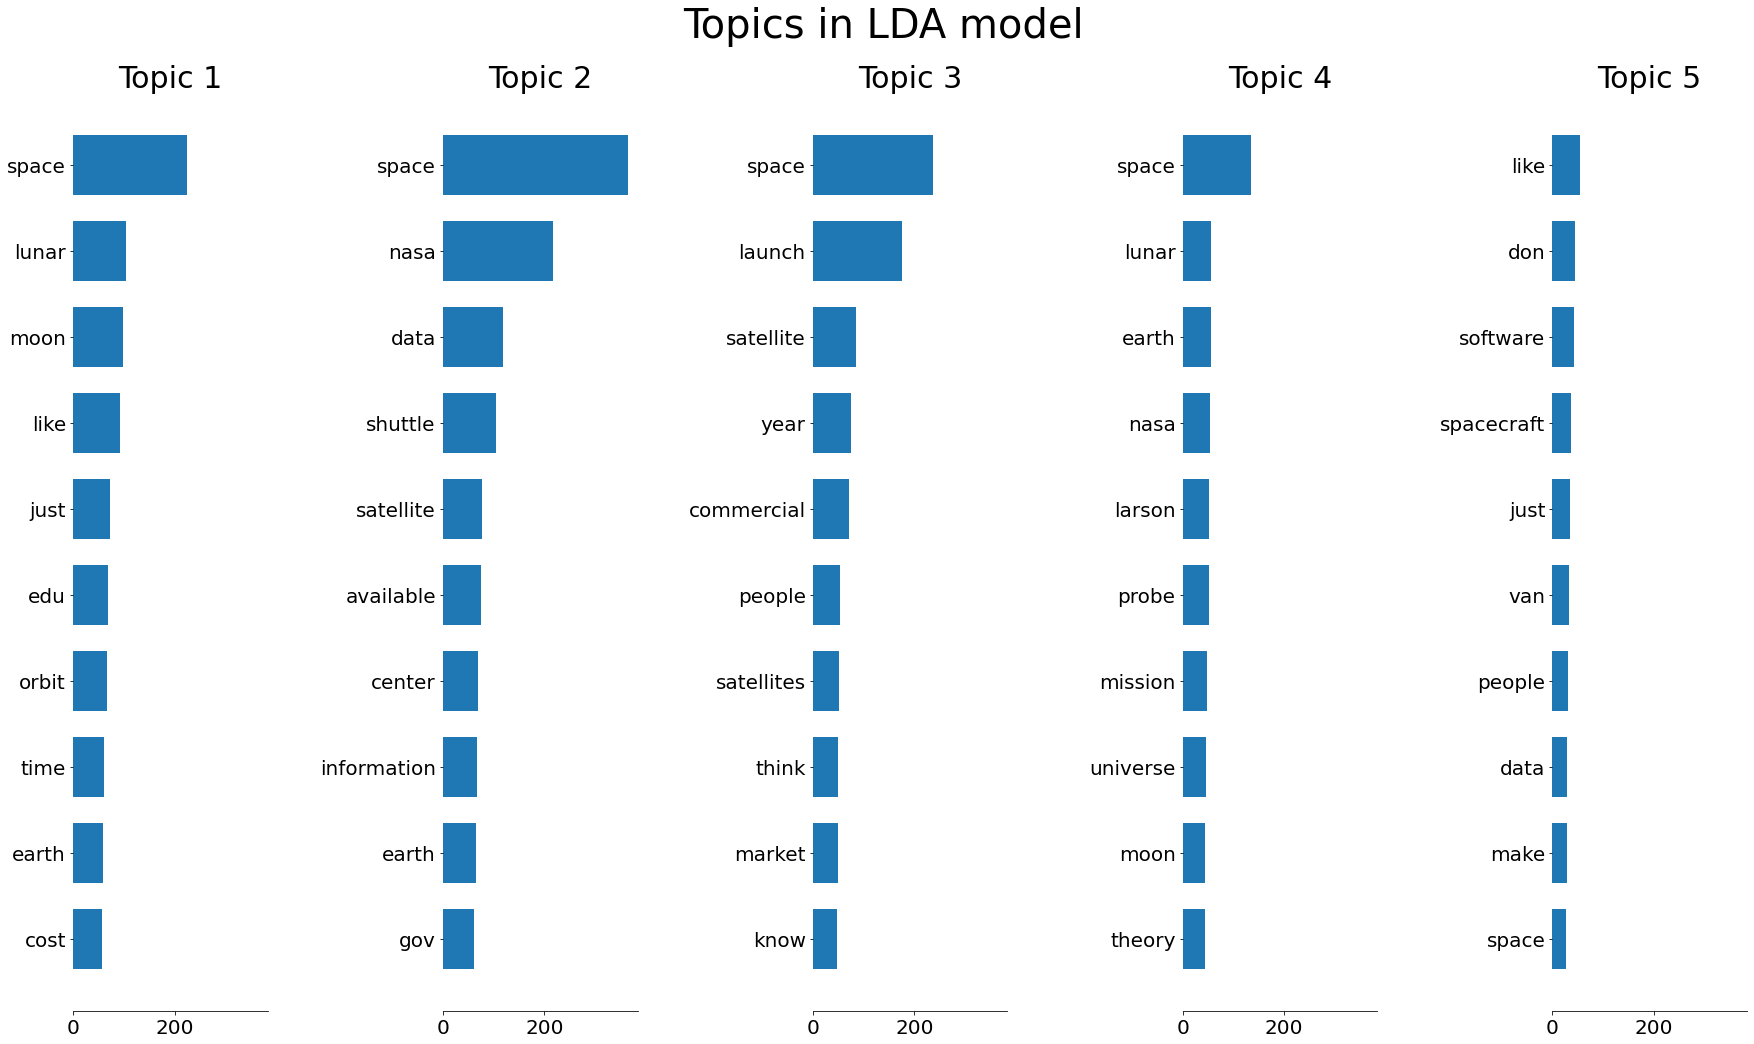

In [54]:
categories = ['sci.space']
newsgroup = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
n_components = 5
n_top_words = 10
vectorizer = CountVectorizer(stop_words='english')

data_vectorized = vectorizer.fit_transform(newsgroup.data)

lda = LatentDirichletAllocation(n_components=n_components, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names, n_top_words, 'Topics in LDA model')

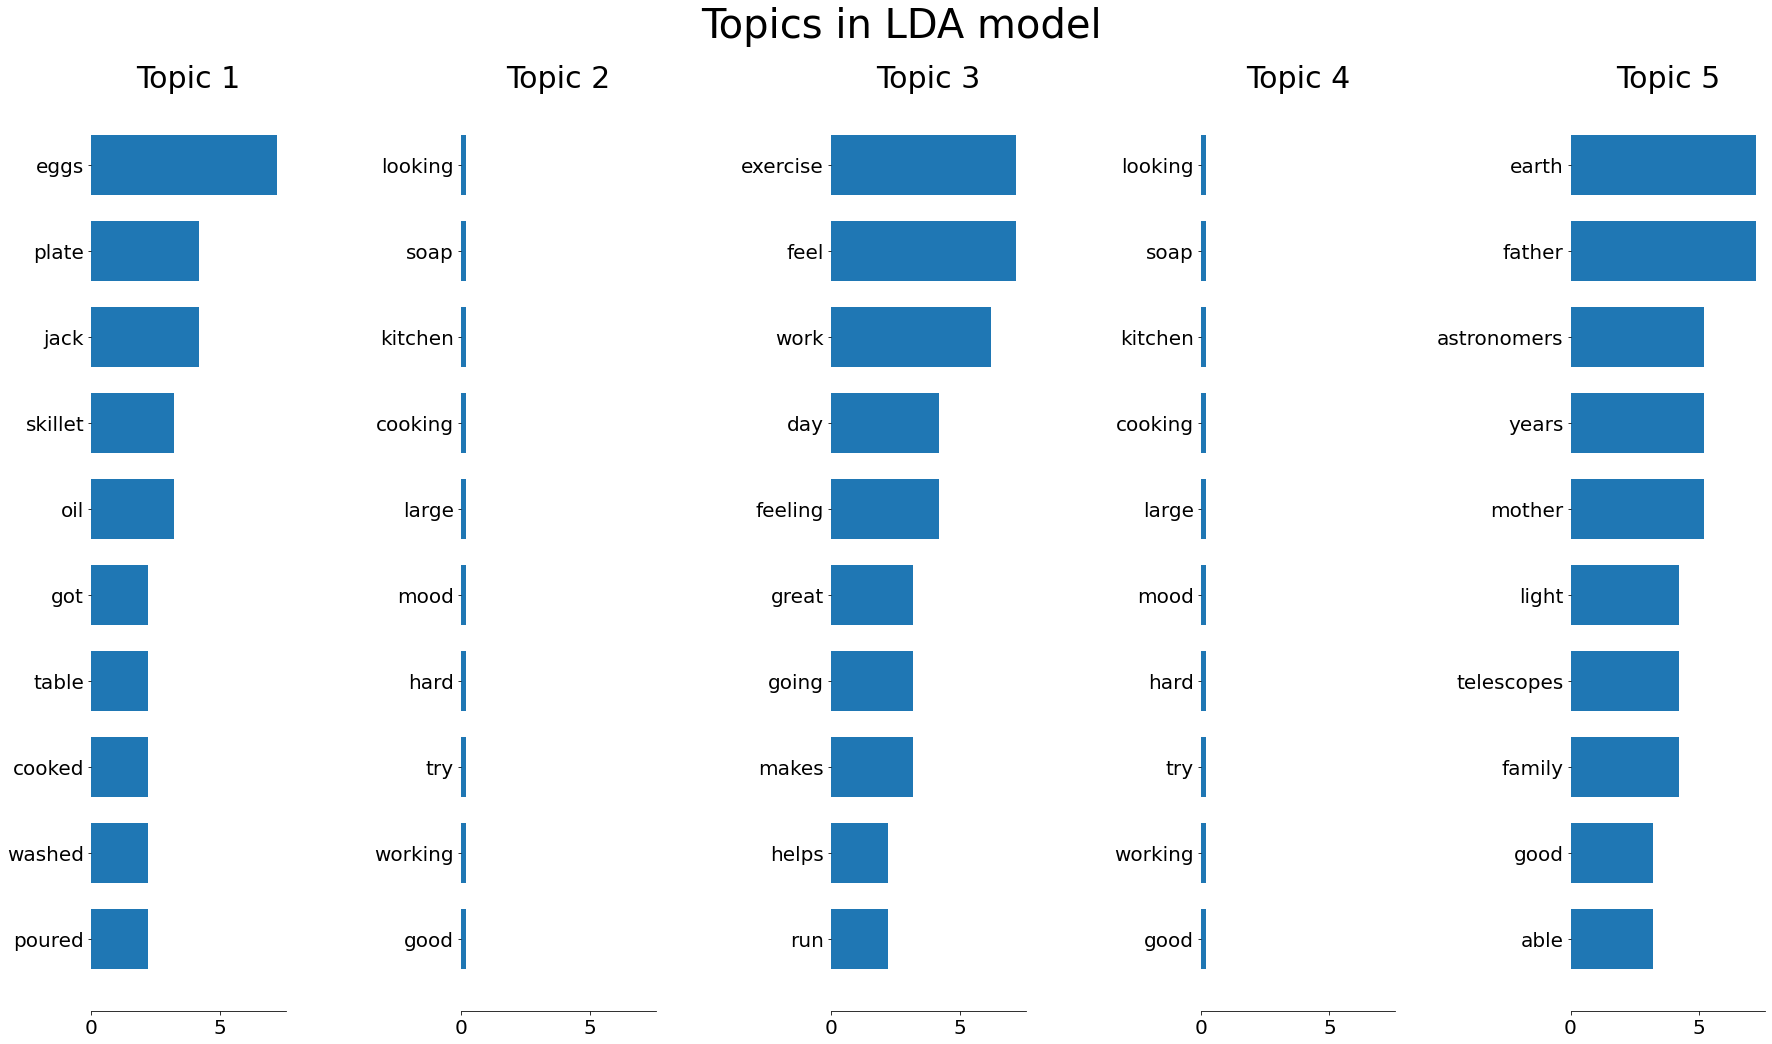

In [55]:



n_components = 5
n_top_words = 10
vectorizer = CountVectorizer(stop_words='english')

data_vectorized = vectorizer.fit_transform(my_train_texts)

lda = LatentDirichletAllocation(n_components=n_components, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names, n_top_words, 'Topics in LDA model')

In [64]:
feature_names

['000',
 '100',
 '18',
 '1990',
 '20',
 '44',
 'able',
 'achievement',
 'ago',
 'ahead',
 'amounts',
 'ancient',
 'andrey',
 'anxious',
 'appear',
 'appearance',
 'asteroid',
 'astronomers',
 'astronomy',
 'ate',
 'away',
 'bad',
 'belt',
 'better',
 'big',
 'biology',
 'bodies',
 'body',
 'books',
 'bowl',
 'brought',
 'brown',
 'care',
 'centauri',
 'certain',
 'chair',
 'change',
 'changed',
 'city',
 'class',
 'classes',
 'clock',
 'close',
 'collective',
 'come',
 'comets',
 'comfortable',
 'common',
 'completely',
 'computers',
 'confidence',
 'confident',
 'cooked',
 'cooking',
 'couldn',
 'cracked',
 'daily',
 'damp',
 'data',
 'day',
 'diameter',
 'did',
 'different',
 'difficult',
 'dining',
 'discovery',
 'dishwashing',
 'distances',
 'distant',
 'doesn',
 'doing',
 'don',
 'earth',
 'easier',
 'easy',
 'effects',
 'eggs',
 'endorphins',
 'euphoria',
 'events',
 'exam',
 'example',
 'exams',
 'exercise',
 'exercising',
 'family',
 'far',
 'fast',
 'father',
 'feel',
 'feelin